# Quickstart

As a first simple example, let's consider a vector set $\mathcal{S} = \{\mathbf{y} \in \mathbb{R}^n : \mathbf{A} \mathbf{y} \geq \mathbf{b}, \mathbf{y} \geq \mathbf{1} \}$, for some $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\mathbf{b} \in \mathbb{R}^n$, and $n,m \in \mathbb{R}$.  

In [1]:
import numpy as np
import cvxpy as cp

import matplotlib.pyplot as plt

from monviso import VI

np.random.seed(2024)

# Create the problem data
n, m = 30, 40
A = np.random.uniform(0, 1, size=(m, n))
b = np.random.uniform(45, 50, size=(m,))

# Define S
y = cp.Variable(n)
S = [A @ y >= b, y >= 1]

Also, let's define $\mathbf{F}(\mathbf{x}) = \mathbf{H} \mathbf{x} + \log(|\mathbf{x}|)$, for some $\mathbf{H} \in \mathbb{R}^{n \times n}$, as the VI vector mapping, and $g(\mathbf{x}) = \|\mathbf{x}\|_1$ as the scalar mapping.

In [2]:
# Create a positive definite H
H = np.random.uniform(2, 10, size=(n, n))

# Define F, g
F = lambda x: H @ x + np.log(np.abs(x))
g = lambda x: cp.norm(x, 1)

Strong monotonicity allows us to use the proximal gradient algorithm to solve such a VI, with a step size of $\chi = 1 / L$, where $L = 1 + \|\mathbf{H}\|$, from the definition on $\mathbf{F}(\cdot)$.

In [3]:
L = 1 + np.linalg.norm(H)
step_size = 1 / L

Let's declare this VI in `monviso` first.

In [4]:
vi = VI(F, g=g, y=y, S=S)

Then, let's create an initial solution.

In [5]:
xk = np.random.uniform(0.1, 1, n)

In `monviso`, the forward-backward-forward algorithm is called `fbf`. Let's iterate over it and collect the distance between two consecutive iteration results in a `residual` vector. 

In [6]:
max_iters = 50
residuals = np.zeros(max_iters)
for k in range(max_iters):
    xk1 = vi.fbf(xk, step_size)        
    residuals[k] = np.linalg.norm(xk - xk1)
    xk = xk1

The API docs have some detail on the [convention for naming iterative steps](../../api/#iterative-methods). Let's take a look at the residuals

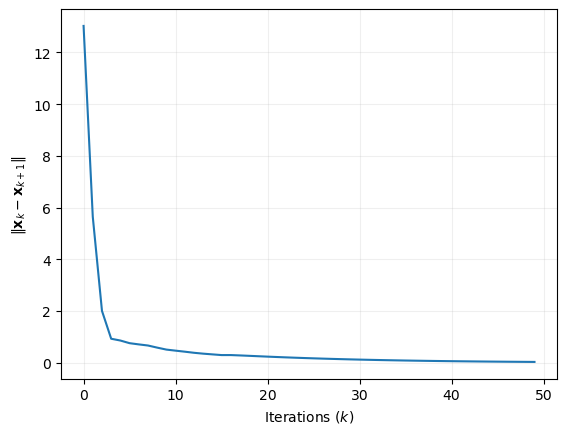

In [7]:
fig, ax = plt.subplots()
ax.plot(residuals)
ax.grid(True, alpha=0.2)
ax.set_xlabel("Iterations ($k$)")
ax.set_ylabel(r"$\|\mathbf{x}_k - \mathbf{x}_{k+1}\|$")
plt.show()